# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

# [作業目標]
- 仿造範例的資料操作, 試著進行指定的離群值處理

# [作業重點]
- 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
- 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
- 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
- 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'D:/Philip/100daysAI/Day_004/Part01'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/Philip/100daysAI/Day_004/Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [11]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all =[np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in range(1,101)]
print(q_all)
print(len(q_all))
pd.DataFrame({'q': list(range(100)),
              'value': q_all})

[6183.0, 6750.0, 7875.0, 8703.0, 9000.0, 9000.0, 9556.650000000003, 10125.0, 10503.0, 11074.5, 11430.0, 11970.0, 12375.0, 12838.5, 13302.0, 13500.0, 13500.0, 13896.0, 14350.5, 14701.5, 15124.5, 15583.5, 15970.5, 16209.0, 16524.0, 16852.5, 17113.5, 17487.0, 17806.5, 18189.0, 18643.5, 19102.5, 19417.5, 19836.0, 20151.0, 20421.0, 20853.0, 21186.0, 21609.0, 21870.0, 22018.5, 22342.5, 22527.0, 22972.5, 23346.0, 23719.5, 23931.0, 24259.5, 24588.0, 24903.0, 25240.5, 25537.5, 25960.5, 26217.0, 26316.0, 26640.0, 26860.5, 27189.0, 27558.0, 28062.0, 28480.5, 28917.0, 29340.0, 29827.799999999974, 30078.0, 30483.0, 30895.650000000052, 31275.0, 31630.5, 32004.0, 32458.5, 32895.0, 33376.5, 33984.0, 34596.0, 35343.0, 35806.5, 36328.5, 36747.0, 37516.5, 37948.5, 38556.0, 39456.0, 40131.0, 40806.0, 41841.0, 42790.5, 43735.5, 44991.0, 45954.0, 47254.5, 48465.0, 49878.0, 51745.5, 53325.0, 55624.5, 58480.65000000005, 62964.0, 70006.5, 258025.5]
100


,q,value
0,0,6183.00
1,1,6750.00
2,2,7875.00
3,3,8703.00
4,4,9000.00
5,5,9000.00
6,6,9556.65
7,7,10125.00
8,8,10503.00
9,9,11074.50


In [6]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
q_50 = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)
print(q_50)
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
24903.0
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==
count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64


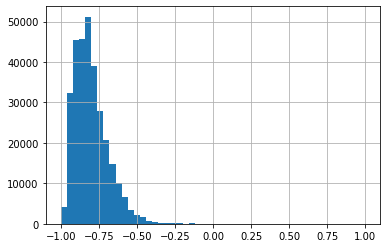

In [10]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    value=x.values
    x=2*((value-min(value))/(max(value)-min(value))-0.5)
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
print(app_train['AMT_ANNUITY_NORMALIZED'].describe())

app_train['AMT_ANNUITY_NORMALIZED'].hist(bins=50)
plt.show()

In [13]:
# 3
from scipy.stats import mode
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
value_most = mode(app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE'])
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
ModeResult(mode=array([450000.]), count=array([26022]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
